# Forecasting

In this workshop, you will forecast the charging profile of a real EV based on historic data of consumption. 
The dataset you will use corresponds to the charging times of many different households during several years. 


In [1]:
import warnings
warnings.filterwarnings("ignore")

# Donwload the data

In [2]:
!pip install wget
!pip install pandas

from datetime import datetime
!pip install numpy
import numpy as np
!pip install matplotlib

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from google.colab import files

import os

import io

import csv

import pandas as pd

import matplotlib as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9445b27a3f5738552a04b3595717cf05319a598e97a71d709573b0a09de1d2d7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive 
drive.mount('/content/drive/')

data_1 = '/content/drive/MyDrive/project/data/3F3BC.csv'
data_2 = '/content/drive/MyDrive/project/data/5F1F0.csv'
data_3 = '/content/drive/MyDrive/project/data/98CA4.csv'
data_4 = '/content/drive/MyDrive/project/data/B4CE3.csv'



np.set_printoptions(suppress=True) # Preventing the use of scientific notation
tab = pd.read_csv(data_1, sep=',')
tab1 = pd.read_csv(data_1, sep=',')
tab2 = pd.read_csv(data_2, sep=',')
tab3 = pd.read_csv(data_3, sep=',')
tab4 = pd.read_csv(data_4, sep=',')


tab = tab.interpolate()
tab1 = tab1.interpolate()
tab2 = tab2.interpolate()
tab3 = tab3.interpolate()
tab4 = tab4.interpolate()


tab4

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,time,value
0,2021/2/1 0:00,756.0
1,2021/2/1 0:01,787.0
2,2021/2/1 0:02,782.0
3,2021/2/1 0:03,782.0
4,2021/2/1 0:04,1275.0
...,...,...
128155,2021/4/30 23:55,693.0
128156,2021/4/30 23:56,452.0
128157,2021/4/30 23:57,184.0
128158,2021/4/30 23:58,183.0


In [5]:
# tab['value'] = tab1['value']
# tab['value'] = (tab1['value']+tab2['value'])/2
# tab['value'] = (tab1['value']+tab2['value']+tab3['value'])/3
tab['value'] = (tab1['value']+tab2['value']+tab3['value']+tab4['value'])/4
tab

,time,value
0,2021/2/1 0:00,568.25
1,2021/2/1 0:01,483.50
2,2021/2/1 0:02,532.00
3,2021/2/1 0:03,488.50
4,2021/2/1 0:04,600.25
...,...,...
128155,2021/4/30 23:55,541.75
128156,2021/4/30 23:56,511.00
128157,2021/4/30 23:57,450.00
128158,2021/4/30 23:58,438.50


# Data Processing/Cleaning

Before implementing a model, we first need to clean the data and prepare it for the training phase.

# Let's select columns of interest

In [6]:
mycolumns = ['time','value']
df=tab[mycolumns]


A = df
# add the day of week information
A['time'] = pd.to_datetime(A['time'])
A['day_of_week'] = A['time'].dt.dayofweek


# A = df.loc[df['ChargerID'] == End_user_ID]
# # add the day of week information
# A['TimeStamp'] = pd.to_datetime(A['TimeStamp'])
# A['day_of_week'] = A['TimeStamp'].dt.dayofweek
# # normalise the power: we only want to know if the end-user charged or not. 
# A.loc[A['Power_W'] > Min_Power, 'Power_W'] = 1

In [7]:
A

,time,value,day_of_week
0,2021-02-01 00:00:00,568.25,0
1,2021-02-01 00:01:00,483.50,0
2,2021-02-01 00:02:00,532.00,0
3,2021-02-01 00:03:00,488.50,0
4,2021-02-01 00:04:00,600.25,0
...,...,...,...
128155,2021-04-30 23:55:00,541.75,4
128156,2021-04-30 23:56:00,511.00,4
128157,2021-04-30 23:57:00,450.00,4
128158,2021-04-30 23:58:00,438.50,4


In [8]:
import itertools


year_list = []
month_list = []
day_list = []
hour_list = []
minute_list = []
min_timeinterval = 30

for combination in itertools.product([2022],[1],[1],list(range(0,24)), [0,30]): # we define a dummy day 2022/01/01 but we are only interested in the time from 0h to 24h
        #print(combination) 
        year_list.append( combination[0] )
        month_list.append( combination[1] )
        day_list.append( combination[2] )
        hour_list.append( combination[3] )
        minute_list.append( combination[4] )


data = {'year':year_list,
                'month':month_list,
                'day':day_list,
                'hour':hour_list,
                'minute':minute_list,
                }

fullday_df = pd.DataFrame(data=data)

fullday_df['time'] = pd.to_datetime( fullday_df[['year', 'month', 'day', 'hour', 'minute']])
fullday_df = fullday_df.drop(columns=['year', 'month', 'day', 'hour', 'minute'])
print(fullday_df)

                  time
0  2022-01-01 00:00:00
1  2022-01-01 00:30:00
2  2022-01-01 01:00:00
3  2022-01-01 01:30:00
4  2022-01-01 02:00:00
5  2022-01-01 02:30:00
6  2022-01-01 03:00:00
7  2022-01-01 03:30:00
8  2022-01-01 04:00:00
9  2022-01-01 04:30:00
10 2022-01-01 05:00:00
11 2022-01-01 05:30:00
12 2022-01-01 06:00:00
13 2022-01-01 06:30:00
14 2022-01-01 07:00:00
15 2022-01-01 07:30:00
16 2022-01-01 08:00:00
17 2022-01-01 08:30:00
18 2022-01-01 09:00:00
19 2022-01-01 09:30:00
20 2022-01-01 10:00:00
21 2022-01-01 10:30:00
22 2022-01-01 11:00:00
23 2022-01-01 11:30:00
24 2022-01-01 12:00:00
25 2022-01-01 12:30:00
26 2022-01-01 13:00:00
27 2022-01-01 13:30:00
28 2022-01-01 14:00:00
29 2022-01-01 14:30:00
30 2022-01-01 15:00:00
31 2022-01-01 15:30:00
32 2022-01-01 16:00:00
33 2022-01-01 16:30:00
34 2022-01-01 17:00:00
35 2022-01-01 17:30:00
36 2022-01-01 18:00:00
37 2022-01-01 18:30:00
38 2022-01-01 19:00:00
39 2022-01-01 19:30:00
40 2022-01-01 20:00:00
41 2022-01-01 20:30:00
42 2022-01-

# Create Training dataset

In this subsection, we will create the output for one day: we now want to create the targets and inputs for our training.
Inputs will be:
1. the type of day (= 0 for monday, ... 6 for sunday)
2. the consumption on the previous day
3. the consumption on the day before the previous day
4. the consumption 3 days before

Outputs will be:
a vector of 96 elements, corresponding to all the quarters in a day. these elements will thus correspond to a timeslot in the day. the first element corresponds to 0:00:00, the second one to 00:00:15  and so on...
These elements will be equal to 1 if the EV is charging at the corresponding time, 0 otherwise.

In [9]:
# first let's convert the data into numpy arrays
from datetime import datetime
!pip install numpy
import numpy as np
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# 30 minutes interval
PP = A['value'].to_numpy()

tt = []
tt = A['time'].to_numpy()

Power = []
timearray = []

length = A['time'].size
num_of_30 = int(length/30)
loop = 0

for i in range (num_of_30):
  timearray.append(tt[loop*30])
  Power.append(sum(PP[loop*30:loop*30+30]))
  loop = loop+1
timearray = np.array(timearray)
Power = np.array(Power)

In [12]:
# Normalization
Power = Power/12000

In [13]:
timearray_fullday = []
timearray_fullday = fullday_df['time'].to_numpy()
Day_type = A['day_of_week'].to_numpy()

In [14]:
timearray

array(['2021-02-01T00:00:00.000000000', '2021-02-01T00:30:00.000000000',
       '2021-02-01T01:00:00.000000000', ...,
       '2021-04-30T22:30:00.000000000', '2021-04-30T23:00:00.000000000',
       '2021-04-30T23:30:00.000000000'], dtype='datetime64[ns]')

In [15]:
# 30 minutes interval
from datetime import timedelta
# conversion des dates, et on enleve les lignes qui n'etaient pas bonnes (time not in a date format, or just some space instaead of time)
# We create the training (input and target) dataset:

Allday_output = np.empty((48,0),int)
input = np.empty((4,0))
# min_timeinterval = 30
# we create a function that generates a vector with 48 elements, with 1 when the car was charging, 0 when it was not.
def generate_daily_profile(power,data_time, time_fullday ):
    out_profile = []
    index = 0
    for element in time_fullday:
        element = element - np.timedelta64(round((element - data_time[0])/np.timedelta64(1, 'D')),'D') #we change the year month and day of the reference time array for full day
        if (index < data_time.size) and (abs(data_time[index] - element)/np.timedelta64(1, 's') < min_timeinterval/2):  #if the time we have here is in the input data_time array, this means we are charging
            out_profile.append(power[index])
            index = index+1
        else:
            out_profile.append(0)

    return out_profile, index

#first, we must identify the number of days
nb_day = 0
previous_element = timearray[0]
for element in timearray:
    if element.astype('M8[D]') != previous_element.astype('M8[D]'):
        if nb_day>=29:
            temp=0
        nb_day = nb_day +1
    previous_element = element

previous_element = timearray[0]
idx_timearray = 0
previous_idx_timearray = 0
count = 0
consumption_d3 = 0  # consumption of the day -3
consumption_d2 = 0  # consumption of the day -2
consumption_d1 = 0  # consumption of the day -1


for day in range(nb_day):
    # print(day)
    if day >=20:
        temp = 0
    for idx in range(49):#  element in timearray: # we will go through the end user data
        # print(idx)

        if timearray[idx+idx_timearray].astype('M8[D]') != previous_element.astype('M8[D]'):
            # dailyprofile_power,current_index = generate_daily_profile(Power[idx_timearray:idx_timearray+idx],timearray[idx_timearray:idx_timearray+idx], timearray_fullday )
            #********************************************************************************
            data_time = timearray[idx_timearray:idx_timearray+idx]
            power = Power[idx_timearray:idx_timearray+idx]
            time_fullday = timearray_fullday 
            out_profile = []
            index = 0
            for element in time_fullday:
                
                element = element - np.timedelta64(round((element - data_time[min(index,data_time.size-1)])/np.timedelta64(1, 'D')),'D') #we change the year month and day of the reference time array for full day
                if (index < data_time.size) and (abs(data_time[index] - element)/np.timedelta64(1, 's') < min_timeinterval/2):  #if the time we have here is in the input data_time array, this means we are charging
                    out_profile.append(power[index])
                    index = index+1
                else:
                    out_profile.append(0)

            dailyprofile_power = out_profile
            current_index = index


            #****************************************************************************
            c = np.datetime_as_string(timearray_fullday, timezone='UTC')
            # df_c = pd.DataFrame(c, columns = ['time'])
            # df_c['power'] = dailyprofile_power
            # df_c.to_csv('daily_profile.csv')
            input = np.c_[input, [Day_type[idx_timearray*30],consumption_d1,consumption_d2,consumption_d3] ]
            consumption_d3 = consumption_d2
            consumption_d2 = consumption_d1
            consumption_d1 = sum(dailyprofile_power)
            # print(input[0])
            Allday_output = np.c_[Allday_output,dailyprofile_power]
            idx_timearray = idx_timearray + current_index
            break
            
        previous_element = timearray[idx_timearray]
   
    previous_element = timearray[idx_timearray]

df_c = pd.DataFrame(input)
df_c.to_csv('inputsSubstation.csv')
df_c = pd.DataFrame(Allday_output)
df_c.to_csv('outputsSubstation.csv')
target = np.transpose(Allday_output)
# print(target.shape)
input = np.transpose(input)
print(input.shape)
print(target.shape)

(88, 4)
(88, 48)


In [16]:
# Remove weekends and the first three days
Input = []
Target = []
number = int(input.size/input[0].size)
for i in range(number):
  if (i!=0)and(i!=1)and(i!=2)and(input[i][0]!=5)and(input[i][0]!=6):
    Input.append(input[i])
    Target.append(target[i])
Input = pd.DataFrame(Input)
Target = pd.DataFrame(Target)
Input = Input.values
Target = Target.values

# Let's try some AI forecast !

First, we need to split the data between train and test

In [17]:
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Input,Target,test_size=0.4,shuffle=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now, we will train different models.
You are asked to test them on different days by changing the variable nb_day_test for each model. The nb_day_test boundary depends on the user you chose.

In [18]:
from sklearn import tree
import calendar
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


model = tree.DecisionTreeRegressor()
model = model.fit(X_train,y_train)

nb_day_test = 15
X_test[nb_day_test:nb_day_test+1,:]
AA = X_test[nb_day_test:nb_day_test+1,:]
y = model.predict(AA)
AA

array([[ 0.        , 85.34864583, 97.69508333, 90.51491667]])

In [19]:
y

array([[1.37314583, 1.9305    , 1.50383333, 1.5506875 , 1.33704167,
        1.29470833, 1.7954375 , 1.4645625 , 1.90154167, 1.45916667,
        1.48941667, 1.57716667, 2.04460417, 2.78972917, 2.253     ,
        3.13279167, 2.25691667, 2.08239583, 2.28589583, 1.61204167,
        1.482875  , 2.21872917, 1.68533333, 1.47925   , 1.13779167,
        1.71110417, 1.34139583, 1.85666667, 2.15083333, 1.48470833,
        2.210625  , 3.45983333, 2.84052083, 2.66391667, 1.49633333,
        1.18160417, 1.18366667, 1.25670833, 1.919375  , 2.08377083,
        1.77477083, 1.2826875 , 2.10772917, 1.32625   , 0.87420833,
        1.31608333, 1.0875625 , 0.8114375 ]])

In [20]:
time_str = []
for element in timearray_fullday:
    time_str.append(str(element)[-18:-13])


# Decision Tree

22.904472295043774
25.78394696180556
The  average MSE of decision tree is:  0.4090084338400674
The  average MAE of decision tree is:  0.4604276243179565
average MAPE of all days:  0.24192364446723394


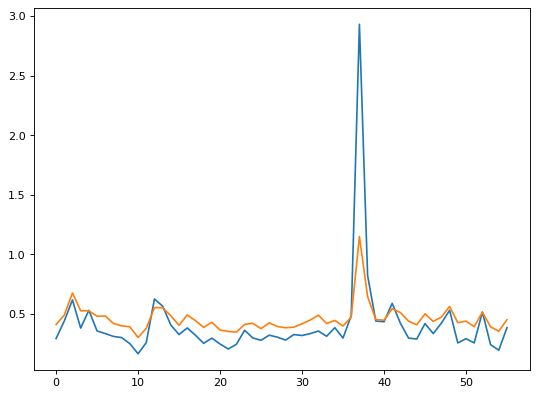

In [21]:
range_1 = 5 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
model = tree.DecisionTreeRegressor(criterion="squared_error",max_depth = 1,min_samples_split = 2, min_samples_leaf = 6, random_state = 60) # MSE/MAE
# model = tree.DecisionTreeRegressor(criterion="absolute_error",max_depth = 1,min_samples_split = 2, min_samples_leaf = 3, random_state = 60) # MAPE

X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 20
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)


MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []

MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  # Y[i] = Y[i]*12000 # method_2
  # Y_test[i] = Y_test[i]*12000

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)
  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)

X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE of decision tree is: ",sum(average_MSE)/size_2)
print("The  average MAE of decision tree is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)
# plt.plot(time_str, MSE[number-1][0], label='MSE '+calendar.day_name[int(X[number-1][0,0])])
# plt.plot(time_str, MAE[number-1][0], label='MAE '+calendar.day_name[int(X[number-1][0,0])])
# x_ticks = np.arange(0, 96, 12)
# plt.xticks(x_ticks)
# ax = plt.gca()
# ax.set_facecolor('w')
# plt.legend()
# plt.show()

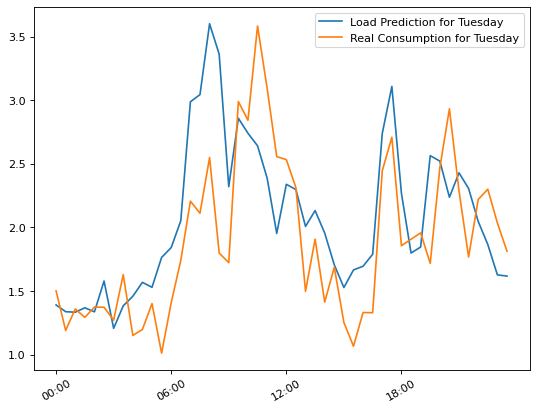

In [22]:
# Forcasting the power conpusmption of the given day.

number = 19
plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame
# plot
plt.plot(time_str,Y[number-1][0], label='Load Prediction for '+calendar.day_name[int(X[number-1][0,0])]) 

plt.plot(time_str,Y_test[number-1][0], label='Real Consumption for '+calendar.day_name[int(X[number-1][0,0])])
# beautify the x-labels
# plt.gcf().autofmt_xtime()
plt.xticks(rotation=30) # Rotate 30 degrees


x_ticks = np.arange(0, 48, 12) 
plt.xticks(x_ticks)
ax = plt.gca()
ax.set_facecolor('w') 
plt.legend()
plt.show()

In [ ]:
# # grid search (for the other method: 14+1)
ii = 0
jj = 0
kk = 0

i = 0
min = 1
range_1 = 5
range_2 = range_1+1
size_2 = int(Input.size/Input[0].size) - range_1

for i in range(1,2,1):
  for j in range(2,3,1):
    for k in range(3,4,1):
      S = 0
      # model=tree.DecisionTreeRegressor(criterion="squared_error",max_depth = i,min_samples_split = j, min_samples_leaf = k, random_state = 60) # squared_error, absolute_error ,max_depth = 3,random_state = 20
      model=tree.DecisionTreeRegressor(criterion="absolute_error",max_depth = i,min_samples_split = j, min_samples_leaf = k, random_state = 60) # squared_error, absolute_error
      for num in range(size_2):
        X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
        MSE = []
        MAPE = []
        model.fit(X_train,y_train)
        Y = model.predict(X_test)
        # MSE = pow((Y - y_test),2) # New definition of the score
        # S = S + sum(sum(MSE))/MSE.size      
        MAPE = abs(Y - y_test)/y_test # mean absolute percent error
        S = S + sum(sum(MAPE))/MAPE.size
      print(i,j,k,S/size_2)
      if min > S/size_2:
        ii = i
        jj = j
        kk = k
        min = S/size_2

print(ii,jj,kk,min)  

1 2 3 0.2606952237806903
1 2 3 0.2606952237806903


In [ ]:
# 1 2 6 0.41226617618800376

# Random Forest

In [23]:
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Input,Target,test_size=0.4,shuffle=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, max_depth = 5,min_samples_split = 69, min_samples_leaf = 18, random_state = 0) #n_estimators = number of trees in the forest  # To be changed
# criterion="absolute_error",max_depth = 5,min_samples_split = 69, min_samples_leaf = 18, random_state = 60
model = model.fit(X_train,y_train)

22.50975918673028
25.311968145880265
The  average MSE is:  0.4019599854773265
The  average MAE is:  0.4519994311764333
average MAPE of all days:  0.23473611564101834


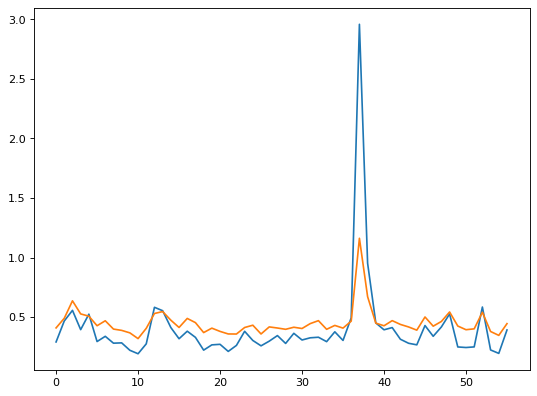

In [25]:
range_1 = 5 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
model = RandomForestRegressor(n_estimators = 37, criterion="absolute_error", max_depth = 1, min_samples_split = 2, min_samples_leaf = 3, random_state = 19) # MSE/MAE
# model = RandomForestRegressor(n_estimators = 37, criterion="absolute_error", max_depth = 1, min_samples_split = 2, min_samples_leaf = 3, random_state = 19) # MAPE   

X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 10
score1 = 0
score2 = 0
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)
  # print(i)

# Calculate the MSE and MAE for all predicted days

MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []

MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  # Y[i] = Y[i]*12000 # method_2
  # Y_test[i] = Y_test[i]*12000

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)

  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)


X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE is: ",sum(average_MSE)/size_2)
print("The  average MAE is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)

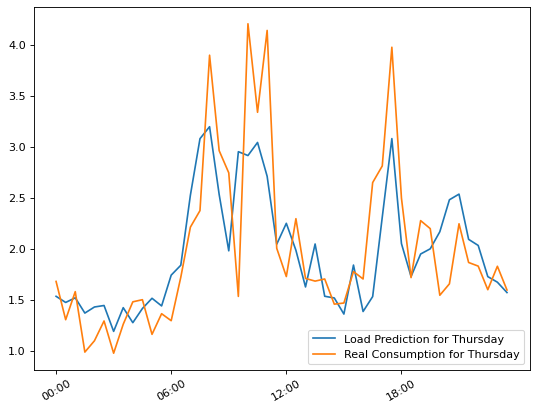

In [26]:
# Forcasting the power conpusmption of the given day.

number = 21
plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame
# plot
plt.plot(time_str,Y[number-1][0], label='Load Prediction for '+calendar.day_name[int(X[number-1][0,0])]) 

plt.plot(time_str,Y_test[number-1][0], label='Real Consumption for '+calendar.day_name[int(X[number-1][0,0])])
# beautify the x-labels
# plt.gcf().autofmt_xtime()
plt.xticks(rotation=30) # Rotate 30 degrees


x_ticks = np.arange(0, 48, 12) 
plt.xticks(x_ticks)
ax = plt.gca()
ax.set_facecolor('w') 
plt.legend()
plt.show()

In [ ]:
# # grid search (for the other method: 14+1)
ii = 0
jj = 0
kk = 0
ll = 0
num_of_tree = []
i = 0
min = 1000
range_1 = 20
range_2 = range_1+1
size_2 = int(Input.size/Input[0].size) - range_1

for i in range(37,38,1):
  for j in range(5,10,1):
    for k in range(2,14,1):
      for l in range(1,6,1):
# for i in range(37,38,1):
#   for j in range(1,2,2):
#     for k in range(2,3,2):
#       for l in range(3,4,1):
        S = 0
        # model = RandomForestRegressor(n_estimators = i, criterion="squared_error", max_depth = j, min_samples_split = k, min_samples_leaf = 3, random_state = 86)    
        # model = RandomForestRegressor(criterion="absolute_error",n_estimators = i,max_depth = j,min_samples_split = k,min_samples_leaf = l,random_state = 19)    
        model = RandomForestRegressor(criterion="squared_error",n_estimators = i,max_depth = j,min_samples_split = k,min_samples_leaf = l,random_state = 19)    
        for num in range(size_2):
          X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
          MSE = []
          model.fit(X_train,y_train)
          Y = model.predict(X_test)
          MSE = pow((Y - y_test),2) # New definition of the score
          S = S + sum(sum(MSE))/MSE.size
          # MAPE = abs(Y - y_test)/y_test # mean absolute percent error
          # S = S + sum(sum(MAPE))/MAPE.size
        print(i,j,k,l,S/size_2)
        num_of_tree.append(S/size_2)
        if min > S/size_2:
          ii = i
          jj = j
          kk = k
          ll = l
          min = S/size_2

print(ii,jj,kk,ll,min)  


37 5 2 1 0.5837618131942575
37 5 2 2 0.571519858179888
37 5 2 3 0.563795364394227
37 5 2 4 0.5626068701360072
37 5 2 5 0.5673425722479262
37 5 3 1 0.5797210242472883
37 5 3 2 0.571519858179888
37 5 3 3 0.563795364394227
37 5 3 4 0.5626068701360072
37 5 3 5 0.5673425722479262
37 5 4 1 0.5820004387422669
37 5 4 2 0.571519858179888
37 5 4 3 0.563795364394227
37 5 4 4 0.5626068701360072
37 5 4 5 0.5673425722479262
37 5 5 1 0.5793931872623117
37 5 5 2 0.5701827471533611
37 5 5 3 0.563795364394227
37 5 5 4 0.5626068701360072
37 5 5 5 0.5673425722479262
37 5 6 1 0.5753905454413226
37 5 6 2 0.5688010037386184
37 5 6 3 0.563795364394227
37 5 6 4 0.5626068701360072
37 5 6 5 0.5673425722479262
37 5 7 1 0.5742749523034819
37 5 7 2 0.5687241728114358
37 5 7 3 0.5608757244676585
37 5 7 4 0.5626068701360072
37 5 7 5 0.5673425722479262
37 5 8 1 0.5684636587168929
37 5 8 2 0.5654625597137981
37 5 8 3 0.5581639708947468
37 5 8 4 0.5626068701360072
37 5 8 5 0.5673425722479262
37 5 9 1 0.5680206752053717


In [ ]:
# 37 2 11 3 0.5560340975234083

# kNN

20.593122303127526
23.218861741630594
The  average MSE is:  0.40378671182602993
The  average MAE is:  0.45527179885550184
average MAPE of all days:  0.24531798263729204


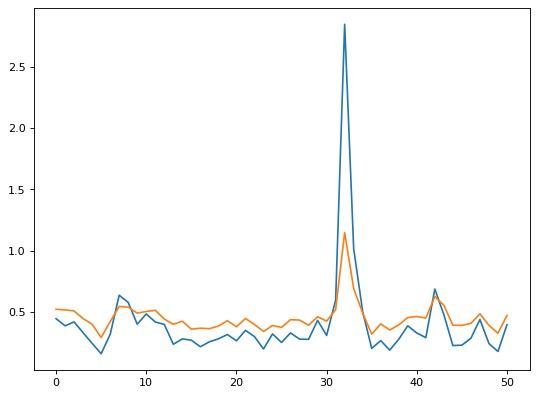

In [28]:
from sklearn.neighbors import KNeighborsRegressor

range_1 = 10 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
# model= KNeighborsRegressor(p=1, n_neighbors=5, weights='distance') # MAPE
model= KNeighborsRegressor(p=1, n_neighbors=10, weights='distance') # MSE/MAE
X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 10
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)

# Calculate the MSE and MAE for all predicted days

MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []
MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  # Y[i] = Y[i]*12000 # method_2
  # Y_test[i] = Y_test[i]*12000

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)
  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)

X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE is: ",sum(average_MSE)/size_2)
print("The  average MAE is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)


In [ ]:
# # grid search (for the other method: 14+1)
for abc in range(26):
  ii = 0
  jj = 0
  num_of_tree = []
  i = 0
  min = 1
  range_1 = abc
  range_2 = range_1+1
  size_2 = int(Input.size/Input[0].size) - range_1

  for i in range(1,3,1):
    for j in range(1,range_2,1):
      S = 0
      model= KNeighborsRegressor(p=i, n_neighbors=j, weights='distance')
      for num in range(size_2):
        X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
        MSE = []
        model.fit(X_train,y_train)
        Y = model.predict(X_test)
        # MSE = pow((Y - y_test),2) # New definition of the score
        # S = S + sum(sum(MSE))/MSE.size
        MAPE = abs(Y - y_test)/y_test # mean absolute percent error
        S = S + sum(sum(MAPE))/MAPE.size
      # print(i,j,S/size_2)
      num_of_tree.append(S/size_2)
      if min > S/size_2:
        ii = i
        jj = j
        min = S/size_2

  print(abc,ii,jj,min)  

0 0 0 1
1 1 1 0.2827390534569612
2 1 2 0.2559823620196982
3 1 3 0.24779495426416712
4 1 4 0.24598356927772394
5 1 5 0.24192364446723397
6 1 6 0.24552417359054385
7 1 7 0.24968184167474997
8 1 3 0.24754539858918548
9 1 6 0.24986834076587014
10 1 6 0.2486400309081658
11 1 6 0.2482087771299505
12 1 6 0.2485785863150781
13 1 8 0.24871607260171336
14 1 7 0.24800232322427537
15 1 7 0.2474015489825475
16 1 7 0.2503707476627929
17 1 7 0.2507832598168514
18 1 8 0.25140852338749886
19 1 8 0.2508047357554155
20 1 9 0.2511933088274189
21 2 9 0.2527861949357879
22 2 9 0.2526858868984151
23 2 9 0.2519627167044403
24 2 9 0.25157733972767804
25 2 9 0.2526767632904077


In [ ]:
# 5 1 5 0.24094270649378718


